# KLCA Heuristic Algorithm

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


'FUNCTIONS DEFINITION - Init'

def global_def():
    global orders, categories, warehouses, Card, NMin, NMax, Theta, NCO, INL, OUTL, in_link, outlink, L, o, x
    global I, J, K

    
def read_data_panda(file_path):
    global orders, categories, o
    global I, J
    
    'Dataset Structure Init'
    data_table = pd.read_csv(file_path, sep=',')
    index = data_table.index
    number_of_rows = len(index)
    
    'Data Lecture'
    orders = data_table.Orders.unique()
    categories = data_table.Category.unique()
    I = len(orders) #Number of order
    J = len(categories) #Number of categories
    orders = np.arange(1, len(orders)+1) #Set of order
    categories = np.arange(1, len(categories)+1) #Set of category
    
    'Resizing Data'
    o = np.zeros((I, J))
    
    'Data Implementation'
    Card_Order = np.zeros(I)
    line = 0
    num_order = 0
    current = data_table.loc[line, "Orders"]
    for step in range(I):
        while data_table.loc[line, "Orders"] == current and line < number_of_rows - 1:
            if o[num_order][data_table.loc[line, "Category"] - 1] == 0:
                Card_Order[num_order] = Card_Order[num_order] + 1
            o[num_order][data_table.loc[line, "Category"] - 1] = 1
            line = line + 1
        num_order = num_order + 1
        current = data_table.loc[line, "Orders"]
        
    'Check Plot'
    #plt.bar(orders, Card_Order)
    #plt.title('Category sum among orders', fontsize=10)
    #plt.ylabel("Nb of Categories")
    #plt.xlabel("Order")
    #plt.show()
    'End Plot'

    
def init_parameters():
    global K

    'NETWORK NODES'
    K = 3 #Number of warehouses
    
    
'START'

Path = 'data/data_order_shorten.csv' #15 Categories
Path2 = 'data/data_order.csv' #60 Categories

global_def()
read_data_panda(Path)
init_parameters()

'END'

'END'

-----------------------------------------------------------------------
---------------------------- Final Solution ---------------------------
-----------------------------------------------------------------------


 Warehouse  1  should store the categories :   { 4, 6, 7, 8, 10, }

 Warehouse  2  should store the categories :   { 1, 3, 5, 9, 12, 13, 14, 15, }

 Warehouse  3  should store the categories :   { 2, 11, }

 Final objective function LWBest =  445

-------------------------- Results Analysis --------------------------



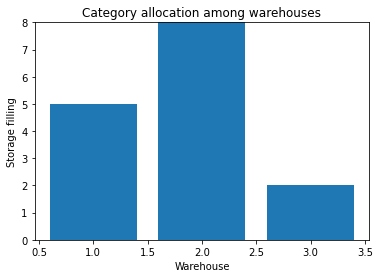

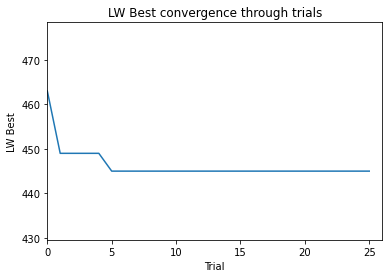

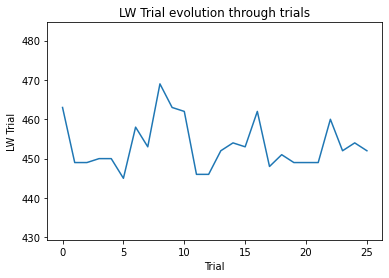

-----------------------------------------------------------------------
-------------------------------- END ----------------------------------
-----------------------------------------------------------------------



'END'

In [35]:
'FUNCTIONS DEFINITION - Main'
    
def data_sizing(I,J,K):
    global warehouses, Card, NMin, NMax, Theta, NCO, INL, OUTL, L, x
    
    'Warehouses Parameters'
    warehouses = np.arange(K) #Warehouse Numbers
    Card=np.zeros((K)) #Filling Level
    NMin = np.full((K),2) #Min warehouse capacity #Assumed equals #Can be read as input
    NMax = np.full((K), 8) #Max warehouse capacity
    OUTL = np.zeros((K,K),dtype = float) #Outlinks between warehouses #Network arcs
    
    'Orders Parameters'
    Theta = np.zeros((I),dtype = float) #Coefficient updating to approach the real maximum split
    NCO = np.zeros((I),dtype = float) #Number of categories in order i
    
    'Graph Parameters'
    L = np.zeros((J,J),dtype = float) #Link Theta-Updated between categories
    INL = np.zeros((J,K),dtype = float) #Inlink between categories and warehouse
    x = np.zeros((J, K)) #Decision variable : Category unique allocation among set of warehouses

    
def link_init():
    global L, NCO, Theta, o
    
    'Category Network Building'
    link = np.zeros((I,J,J),dtype = float)
    for i in range(len(orders)):
        NCO[i] = count_NCO(i)
        Theta[i] = theta(NCO[i])
        if NCO[i] > 1:
            for j in range(len(categories)-1):
                for q in range(j+1, len(categories)):
                        link[i][j][q] = Theta[i]*o[i][j]*o[i][q] #Theta-Updated
                        link[i][q][j] = link[i][j][q] #Symmetry
                        L[j][q] = L[j][q] + link[i][j][q] #Summing
                        L[q][j] = L[j][q] #Symmetry

                        
def matrix_init():
    global warehouses, categories, INL, OUTL, x, L
    global outlink, in_link
    
    'CATEGORY NETWORK AGGREGATION TO BUILD WAREHOUSE NETWORK'
    #Only once category are allocated among warehouses (x implemented)

    'Network Structure Init'
    in_link = np.zeros((J,J,K),dtype = float)
    outlink = np.zeros((J,J,K,K),dtype = float)
    INL = np.zeros((J,K),dtype = float)
    OUTL = np.zeros((K,K),dtype = float)
    
    'Warehouse Network Building'
    for k in range(len(warehouses)):
        for j in range(len(categories)-1):
            for q in range(j+1, len(categories)):
                in_link[j][q][k] = L[j][q]*x[j][k]*x[q][k]
                in_link[q][j][k] = in_link[j][q][k]
                INL[j][k] = INL[j][k] + in_link[j][q][k]
                INL[q][k] = INL[q][k] + in_link[q][j][k]
                for g in range(k+1, len(warehouses)):
                    if g != k :  #Not in_link imply : stored in another warehouse
                        outlink[j][q][k][g] = L[j][q]*x[j][k]*x[q][g]
                        outlink[q][j][g][k] = L[q][j]*x[j][k]*x[q][g]
                        outlink[j][q][g][k] = L[j][q]*x[j][g]*x[q][k]
                        outlink[q][j][k][g] = L[q][j]*x[j][g]*x[q][k]
                        OUTL[k][g]=OUTL[k][g] + outlink[j][q][k][g] + outlink[q][j][k][g]
                        OUTL[g][k]=OUTL[g][k] + outlink[q][j][g][k] + outlink[j][q][g][k]
                        

def matrix_init_CW():
    global categories, warehouses, x
        
    'Storing Allocation Solution'
    CW = np.zeros((J,K),dtype = float)
    for j in range(len(categories)):
        for k in range(len(warehouses)):
            CW[j][k]=x[j][k]
    return CW


def count_NCO(i):
    global categories, o
    
    'Category Count Among One Order i'
    NCCount=0
    for j in range(len(categories)):
        NCCount = NCCount + o[i][j]
    return NCCount


def theta(NCO):
    
    'THETA CORRECTION COEFFICIENT CALCULUS'
    if NCO < 2:
        return 1
    return (NCO-1)/(combinatorial(NCO, 2))


def combinatorial(n, k):
    
    'COMBINATORIAL FUNCTION'
    if n < k:
        return 0
    return (factorial(n))/(factorial(k)*factorial(n-k))


def factorial(n):
    
    'FACTORIAL FUNCTION'
    if n == 0:
        return 1
    else:
        return n*factorial(n-1)


def init_LW():
    global warehouses, OUTL
    
    'HEURISTIC OBJECTIVE FUNCTION CALCULATION'
    #Upper Bound of the real Order-Split-Sum
    LW = 0
    for k in range(len(warehouses)-1):
        for g in range(k+1, len(warehouses)):
            LW = LW + OUTL[k][g]
    return LW


def init_LWBest():
    global categories, L
        
    'LW UPPER BOUND CALCULATION'
    #Upper Bound of any LW solution-related value
    LW = 0
    for j in range(len(categories)-1):
        for q in range(j+1, len(categories)):
            LW = LW + L[j][q]
    return LW


def calcul_DL(category, current_warehouse, new_warehouse):
    global categories, outlink, OUTL, INL, x
        
    'RELOCATION PLUS OR MINUS VALUE CALCULATION'
    Count_OUTL = 0
    DL = 0
    for q in range(len(categories)):
        if x[q][new_warehouse] == 1 and q != category :
            Count_OUTL = Count_OUTL + outlink[category][q][current_warehouse][new_warehouse]
    DL=Count_OUTL - INL[category][current_warehouse]
    return DL


def calcul_payoff(cat1, cat2, war1, war2):
    global categories, outlink, OUTL, INL, x, L
    
    'EXCHANGE PLUS OR MINUS VALUE CALCULATION'
    payoff = 0
    DL1 = 0
    DL2 = 0
    DL1 = calcul_DL(cat1, war1, war2)
    DL2 = calcul_DL(cat2, war2, war1)
    payoff = DL1 + DL2 - (2 * L[cat1][cat2])
    if payoff < 0:
        return 0
    return payoff


def randomize_category_allocation():
    global categories, warehouses, Card, NMin, NMax, x, K
    
    'FEASIBLE & RANDOMIZED SOLUTION BUILDING'
    #Could be replace by other heuristics
    
    'Data Init'
    x=np.zeros((J, K))
    Card=np.zeros((K))
    To_Place=list(categories)
    Not_Full=list(warehouses)
    
    'Minimum Capacity Requirement Completion'
    for k in range(len(warehouses)):
        if k == 0 and K*NMin[k] > len(To_Place): #Only bc NMin k is equal for all warehouses
            print('La capacité des entrepôt est trop importante (trop d entrepots). Le problème n\'est pas faisable')
            break
        while Card[k] < NMin[k]:
            cat_to_place=To_Place[np.random.randint(0, len(To_Place))]
            x[cat_to_place - 1][k]=1
            Card[k]=Card[k] + x[cat_to_place - 1][k]
            To_Place.remove(cat_to_place)
        if Card[k] == NMax[k]: #Only if NMin == NMax
            Not_Full.remove(k)

    'Randomized allocation of a random quantity of category in the left-free-room in a randomly chosen warehouse'
    while len(To_Place) > 0:
        if len(Not_Full) == 0:
            print('La capacité des entrepôt est trop faible. Le problème n\'est pas faisable')
            break
        'Warehouse choice'
        k=Not_Full[np.random.randint(0, len(Not_Full))]
        'Quantity to place choice'
        if int(min((NMax[k] - Card[k]), len(To_Place))) <= 1:
            nb_to_place=1
        else:
            nb_to_place=np.random.randint(1, int(min((NMax[k] - Card[k]), len(To_Place))))
        'Category allocation'
        for choice in range(nb_to_place):
            cat_to_place=To_Place[np.random.randint(0, len(To_Place))]
            x[cat_to_place - 1][k]=1
            Card[k] = Card[k] + x[cat_to_place - 1][k]
            To_Place.remove(cat_to_place)
        if Card[k] == NMax[k]:
            Not_Full.remove(k)
            
    'Check Plot'
    #plt.bar(warehouses, Card)
    #plt.title('Category allocation among warehouses', fontsize=10)
    #plt.show()
    'End'


def error_check_allocation():
    global categories, warehouses, K, x
        
    'ERROR CHECKING OF A SOLUTION-RELATED CATEGORY ALLOCATION'
    SUM = np.zeros(K)
    
    'Ensuring all categories are affected once and not more'
    for j in range(len(categories)):
        Affect=0
        for k in range(len(warehouses)):
            Affect=Affect + x[j][k]
            SUM[k]=SUM[k] + x[j][k]
        if Affect != 1:
            return True
    
    'Ensuring filling doest go further NMax'
    for k in range(len(warehouses)):
        if SUM[k] > NMax[k]:
            return True
    return False


def relocate_move(category, current_warehouse, new_warehouse):
    global Card, x
        
    'RELOCATION CATEGORY FROM ONE WAREHOUSE TO ANOTHER'
    #We made sure to update the filling levels and warehouse network
    x[category][current_warehouse] = 0
    Card[current_warehouse] = Card[current_warehouse] - 1
    x[category][new_warehouse] = 1
    Card[new_warehouse] = Card[new_warehouse] + 1
    matrix_update_relocate(category, current_warehouse, new_warehouse)


def matrix_update_relocate(category, current_warehouse, new_warehouse):
    global warehouses, categories, INL, OUTL, x, L
    global outlink, in_link
    
    'UPDATING THE WAREHOUSE NETWORK AFTER A RELOCATION MO'
    for j in range(len(categories)):
        #'DEALING WITH ALL THE CATEGORIES IN THE PREVIOUS WAREHOUSE'
        if j != category and x[j][current_warehouse] == 1:
            'Inlinks are now Outlinks'
            outlink[j][category][current_warehouse][new_warehouse] = in_link[j][category][current_warehouse]
            outlink[category][j][new_warehouse][current_warehouse] = in_link[category][j][current_warehouse]
            'Previous Warehouse INL Decreasing'
            INL[j][current_warehouse] = INL[j][current_warehouse] -  in_link[j][category][current_warehouse]
            INL[category][current_warehouse] = INL[category][current_warehouse] - in_link[category][j][current_warehouse]
            'OUTL Increasing'
            OUTL[current_warehouse][new_warehouse] = OUTL[current_warehouse][new_warehouse] + outlink[j][category][current_warehouse][new_warehouse]
            OUTL[new_warehouse][current_warehouse] = OUTL[current_warehouse][new_warehouse]
            'Inlinks are now equals to zero'
            in_link[j][category][current_warehouse] = 0
            in_link[category][j][current_warehouse] = 0
        #'DEALING WITH ALL THE CATEGORIES IN THE PREVIOUS WAREHOUSE'
        elif j != category and x[j][new_warehouse] == 1:
            'Outlinks are now Inlinks'
            in_link[j][category][new_warehouse] = outlink[j][category][new_warehouse][current_warehouse]
            in_link[category][j][new_warehouse] = outlink[category][j][current_warehouse][new_warehouse]
            'New Warehouse INL Increasing'
            INL[j][new_warehouse] = INL[j][new_warehouse] + in_link[j][category][new_warehouse]
            INL[category][new_warehouse] = INL[category][new_warehouse] + in_link[category][j][new_warehouse]
            'OUTL Decreasing'
            OUTL[current_warehouse][new_warehouse] = OUTL[current_warehouse][new_warehouse] - outlink[category][j][current_warehouse][new_warehouse]
            OUTL[new_warehouse][current_warehouse] = OUTL[current_warehouse][new_warehouse]
            'Outlinks are now equals to zero'
            outlink[j][category][new_warehouse][current_warehouse]  = 0
            outlink[category][j][current_warehouse][new_warehouse] = 0
        #'DEALING WITH ALL THE CATEGORIES IN THE OTHERS WAREHOUSES'
        elif j != category and x[j][new_warehouse] == 0 and x[j][current_warehouse] == 0:
            for k in range(len(warehouses)):
                if k != new_warehouse and k != current_warehouse and x[j][k] == 1:
                    'Oulink are now leading to the new warehouse'
                    outlink[j][category][k][new_warehouse] = outlink[j][category][k][current_warehouse]
                    outlink[category][j][new_warehouse][k] = outlink[category][j][current_warehouse][k]
                    'OUTL Correct Re-Assignment'
                    OUTL[current_warehouse][k] = OUTL[current_warehouse][k] - outlink[category][j][current_warehouse][k]
                    OUTL[new_warehouse][k] = OUTL[new_warehouse][k] + outlink[category][j][current_warehouse][k]
                    OUTL[k][current_warehouse] = OUTL[current_warehouse][k]
                    OUTL[k][new_warehouse] = OUTL[new_warehouse][k]
                    'Previous outlink are now equals to zero'
                    outlink[j][category][k][current_warehouse] = 0
                    outlink[category][j][current_warehouse][k] = 0
    #To avoid very little value (like 1.e-134)
    INL[category][current_warehouse] = 0


def exchange_move(category1, category2, warehouse1, warehouse2):
    global x
        
    'EXCHANGE CATEGORY FROM ONE WAREHOUSE TO ANOTHER'
    #We made sure to update the warehouse network
    x[category1][warehouse1] = 0
    x[category2][warehouse2] = 0
    x[category1][warehouse2] = 1
    x[category2][warehouse1] = 1
    matrix_update_relocate(category1, warehouse1, warehouse2)
    matrix_update_relocate(category2, warehouse2, warehouse1)


def display(CWBest, LWBest, LWBestPlot, LWTrialPlot, trial):
    global warehouses, categories, Card, NMax, x
        
    'DISPLAYING THE FINAL SOLUTION'
    #Can be improved depending on the managers DSS requirements and DataViz Libraries Options
    print('-----------------------------------------------------------------------')
    print('---------------------------- Final Solution ---------------------------')
    print('-----------------------------------------------------------------------\n')
    for k in range(len(warehouses)):
        Card[k] = 0
        print('\n Warehouse ',k + 1,' should store the categories :   ', end = '')
        print ('{', end =' ')
        for j in range(len(categories)):
            if CWBest[j][k] == 1:
                Card[k] = Card[k] + CWBest[j][k]
                print (j + 1, end =', ')
        print('}')
    print('\n Final objective function LWBest = ', LWBest)
    print('\n-------------------------- Results Analysis --------------------------\n')
    plt.bar(warehouses+1, Card)
    plt.title('Category allocation among warehouses')
    plt.xlabel("Warehouse")
    plt.ylabel("Storage filling")
    plt.ylim(0,NMax[0])
    plt.show()
    print('\n')

    plt.plot(LWBestPlot)
    plt.title("LW Best convergence through trials")
    plt.ylabel("LW Best")
    plt.ylim(min(LWBestPlot) - (max(LWBestPlot)/30), max(LWBestPlot) + (max(LWBestPlot)/30))
    plt.xlabel("Trial")
    plt.xlim(0,trial)
    plt.show()
    print('\n')

    plt.plot(LWTrialPlot)
    plt.title("LW Trial evolution through trials")
    plt.ylabel("LW Trial")
    plt.ylim(min(LWTrialPlot) - (max(LWTrialPlot)/30), max(LWTrialPlot) + (max(LWTrialPlot)/30))
    plt.xlabel("Trial")
    plt.show()
    print('-----------------------------------------------------------------------')
    print('-------------------------------- END ----------------------------------')
    print('-----------------------------------------------------------------------\n')

    
def display_verif(CWBest):
    global warehouses, categories
        
    #To ensure final calculation of LW makes sense
    LWverif = 0
    for k in range(len(warehouses)):
        for j in range(len(categories)):
                for g in range(len(warehouses)):
                        for i in range(len(categories)):
                            if i!=j and k!=g and CWBest[j][k]==1 and CWBest[i][g]==1:
                                LWverif = LWverif + L[j][i]
    print('LWVerif =', LWverif/2)

    
def display_verif_CPLEX(CWBest):
    global warehouses, categories
        
    #To ensure final calculation of LW makes sens
    LWverif = 0
    for k in range(len(warehouses)):
        for j in range(len(categories)):
            for i in range(len(categories)):
                if i!=j and CWBest[j][k]==1 and CWBest[i][k]==1:
                    LWverif = LWverif + L[j][i]
    print('-----------------------------------------------------------------------\n')
    print('Number of inlink =', LWverif/2,'\n')
    LWverif = 0
    for k in range(len(warehouses)):
        for j in range(len(categories)):
                for g in range(len(warehouses)):
                        for i in range(len(categories)):
                            if i!=j and k!=g and CWBest[j][k]==1 and CWBest[i][g]==1:
                                LWverif = LWverif + L[j][i]
    print('Number of outlink =', LWverif/2,'\n')
    print('-----------------------------------------------------------------------')
    for k in range(len(warehouses)):
        Card[k] = 0
        print('\n Warehouse ',k + 1,' should store the categories :   ', end = '')
        print ('{', end =' ')
        for j in range(len(categories)):
            if CWBest[j][k] == 1:
                Card[k] = Card[k] + CWBest[j][k]
                print (j + 1, end =', ')
        print('}')
    print('\n---------------------------------------------------------------------\n')

    
def main():
    
    'KLCA-HEURISTIC'
    #Refer to the logigram if needed
    global orders, categories, warehouses, Card, NMin, NMax, x
    global I, J, K

    'VAR INIT'
    LWBest = 0
    CWBest = []

    'Plot Var Init'
    LWTrialPlot = []
    LWBestPlot = []

    'VALUE INIT'
    LWBest = init_LWBest()
    trial = 0
    BestTrial = 0
    TrialNonImprovedBound = 30

    'LOOP - Trial'
    while(trial-BestTrial) <= TrialNonImprovedBound and trial <= 25: #Stopping criterion
        
        'Feasible Solution Building'
        randomize_category_allocation()
        matrix_init()

        trial = trial + 1

        'INIT LOOP - Iter'
        CWtrial = matrix_init_CW()
        LWtrial = init_LW()
        LWiter = int(LWtrial)
        ITER = 1
        improved = True
        k = 0
        previous = -1

        'LOOP - Iter'
        while improved and ITER <= 5 :

            ITER = ITER + 1

            'Warehouse Selection Depending On Obvious Criteria'
            selection = 0
            while (Card[k] == NMin[k] or k == previous) and selection < 20 :
                selection = selection + 1
                k=np.random.randint(len(warehouses))
            previous = k

            'Finding the best relocation feasible movement'
            DLBiggest= 0
            DL = 0
            if Card[k] > NMin[k] :
                for j in range(len(categories)):
                    if x[j][k] == 1:
                        for g in range(len(warehouses)):
                            if g != k and (NMax[g] - Card[g]) >= 1:
                                DL = calcul_DL(j, k, g)
                                if DL > DLBiggest:
                                    DLBiggest = DL
                                    to_move=j
                                    current_war = k
                                    new_war=g
            else :
                if ITER >= 5 :
                    improved = False
            if DLBiggest > 0 and improved:
                relocate_move(to_move, current_war, new_war)
                LWiter = LWiter - DLBiggest
            else:
                if ITER >= 5 :
                    improved=False

            'Finding the best valuable exchange movement'
            PayoffBiggest = 0
            Payoff = 0
            for j in range(len(categories)):
                if x[j][k] == 1:
                    for g in range(len(warehouses)):
                        if g != k :
                            for i in range(j+1, len(categories)):
                                if x[i][g] == 1 and i != j:
                                    Payoff = calcul_payoff(j, i, k, g)
                                    if Payoff > PayoffBiggest:
                                        PayoffBiggest = Payoff
                                        cat1 = j
                                        cat2 = i
                                        war1 = k
                                        war2 = g
            if PayoffBiggest > 0 :
                exchange_move(cat1, cat2, war1, war2)
                LWiter = LWiter - PayoffBiggest
            else:
                if ITER >= 5 :
                    improved=False

        CWtrial = matrix_init_CW()
        LWtrial = int(LWiter)
        LWTrialPlot.append(LWtrial)
        
        if LWtrial < LWBest:
            CWBest = list(CWtrial)
            LWBest = LWtrial
            OUTLBest = OUTL
            BestTrial = int(trial)
        LWBestPlot.append(LWBest)

    Check = error_check_allocation()
    if Check == True:
        print('The final solution is not feasible. Check the code')
    else:
        display(CWBest, LWBest, LWBestPlot, LWTrialPlot, trial)
        #display_verif(CWBest)
        #display_verif_CPLEX(CWBest)
    'KLCA-End'


'START'
    
for i in range(1): 
    'Testing multiple times'
    data_sizing(I,J,K)
    link_init()
    main()

'END'